# MY_TRC Comparisons

In [1]:
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [2]:
def draw_temporal(Ba):
    Ba_mean=np.mean(np.mean(Ba[:, 0, :, :], 2), 1)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca(); ax.grid()
    ax.plot(Ba_mean, 'k-', linewidth=3)

In [3]:
def draw_Ba(Ba, nav_lon, nav_lat, vmax=100):
    fig = plt.figure(figsize=(20, 20))
    ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
    ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax1)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.pcolor(x, y, Ba[0, 0, :, :], vmin=0, vmax=vmax, cmap=plt.cm.gist_ncar_r)
    proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
    ax1.set_title('(a) First year January', fontsize=12, fontweight='bold', y=1.025)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax2)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    CS=proj.pcolor(x, y, Ba[10, 0, :, :], vmin=0, vmax=vmax, cmap=plt.cm.gist_ncar_r)
    proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
    ax2.set_title('(b) First year November', fontsize=12, fontweight='bold', y=1.025)
    #
    cax  = fig.add_axes([0.75, 0.25, 0.02, 0.5])
    CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
    CBar.set_label('Ba concentration ( 1E-6 mol/L )', fontsize=12)
    CBar.ax.tick_params(axis='x', length=20)
    
def draw_rnf(rnf, nav_lon, nav_lat):
    fig = plt.figure(figsize=(20, 20))
    ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
    ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax1)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.pcolor(x, y, rnf[0, :, :], vmin=0, vmax=1e-4, cmap=plt.cm.gist_ncar_r)
    proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
    ax1.set_title('(a) First year January', fontsize=12, fontweight='bold', y=1.025)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax2)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    CS=proj.pcolor(x, y, rnf[10, :, :], vmin=0, vmax=1e-4, cmap=plt.cm.gist_ncar_r)
    proj.plot(x, y, 'k-', linewidth=0.25); proj.plot(x.T, y.T, 'k-', linewidth=0.25)
    ax2.set_title('(b) First year November', fontsize=12, fontweight='bold', y=1.025)
    #
    cax  = fig.add_axes([0.75, 0.25, 0.02, 0.5])
    CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
    CBar.set_label('RNF', fontsize=12)
    CBar.ax.tick_params(axis='x', length=20)

# Content
1. [**MY_TRC EXP01**](#MY_TRC-EXP01)
1. [**MY_TRC EXP02**](#MY_TRC-EXP02)

# MY_TRC EXP01

```frotran
trn(:, :, 1, jpmyt1) = Ba(:,:)
```

In [4]:
ptrc_filename=glob.glob('_data/EXP01*.nc')
ptrc_obj = nc.Dataset(ptrc_filename[0])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

IndexError: list index out of range

In [5]:
Ba.max()

3.819657e+08

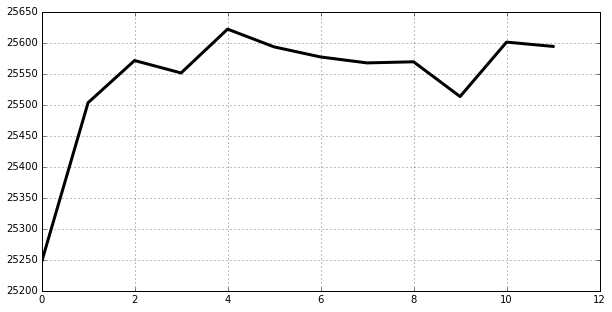

In [6]:
draw_temporal(Ba)

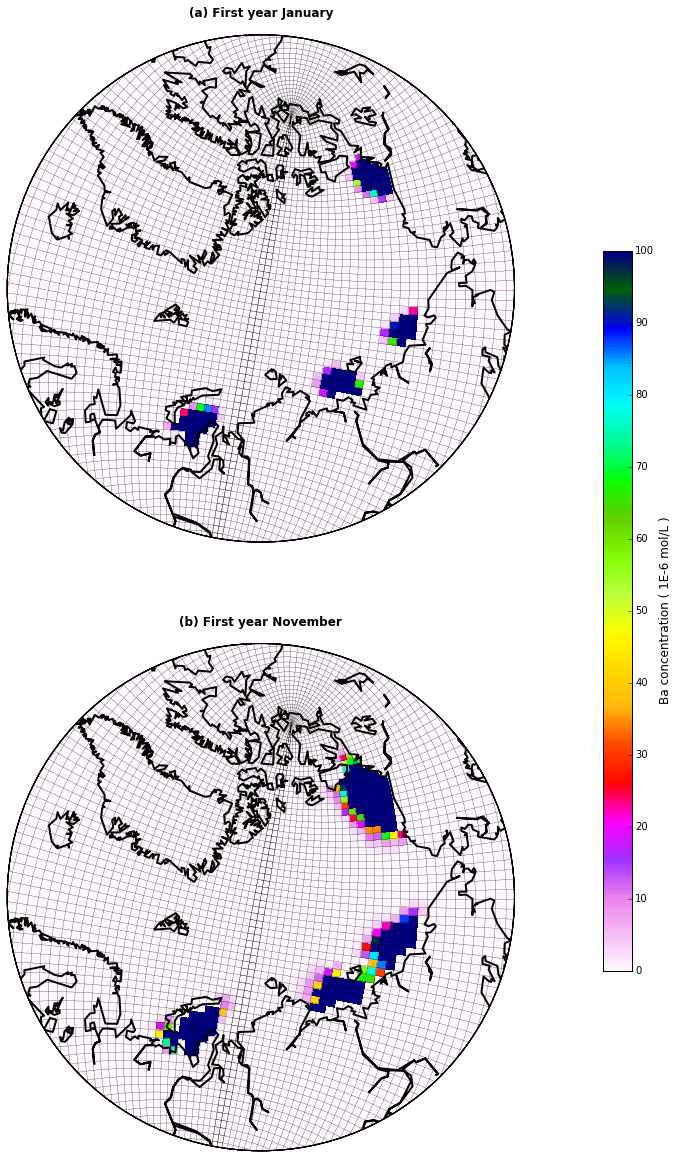

In [7]:
draw_Ba(Ba, longitude, latitude)

# MY_TRC EXP02

```frotran
trn(:, :, 1, jpmyt1) = Ba(:,:)*rnf(:, :)/gdept(1, :, :)
```

In [22]:
filename=glob.glob('_data/EXP02*.nc')
grid_obj = nc.Dataset(filename[0])
rnf = grid_obj.variables['runoffs'][:]
ptrc_obj = nc.Dataset(filename[1])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

In [23]:
Ba.max()

10447290.0

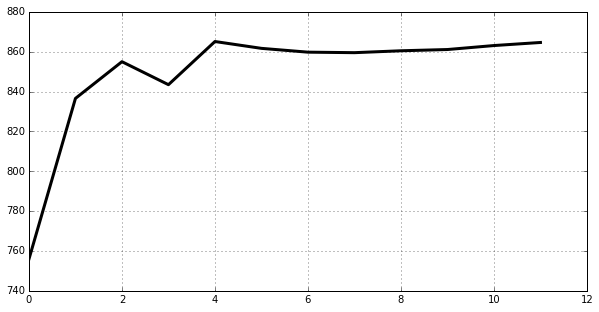

In [24]:
draw_temporal(Ba)

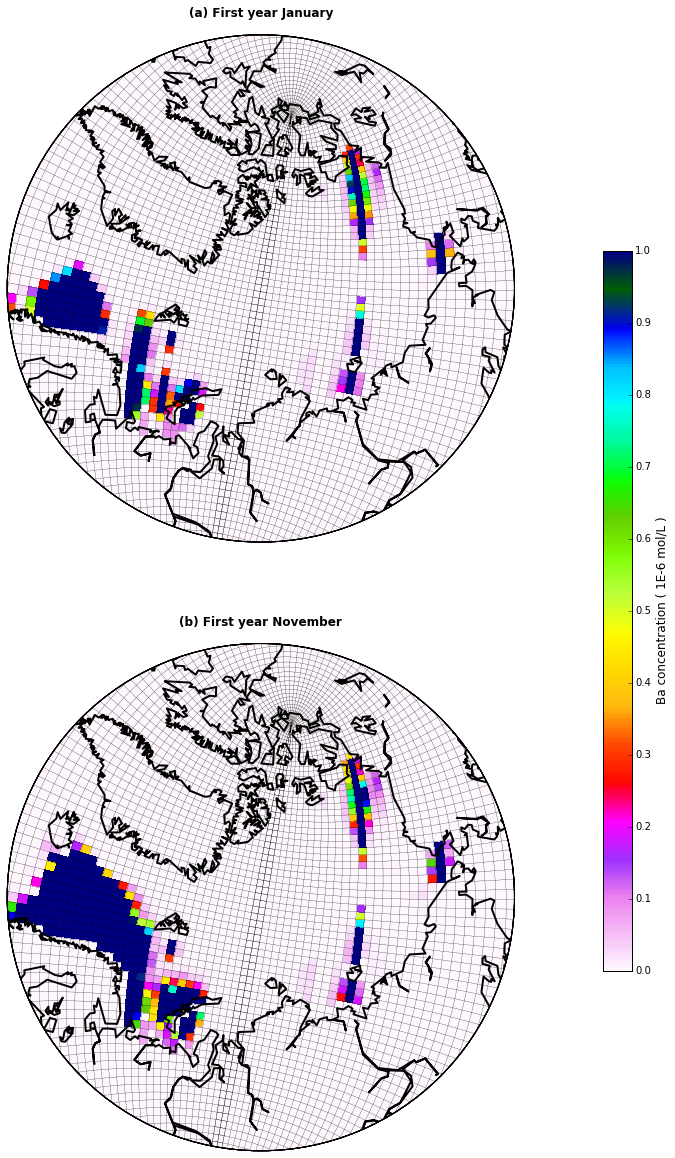

In [25]:
draw_Ba(Ba, longitude, latitude, vmax=1)

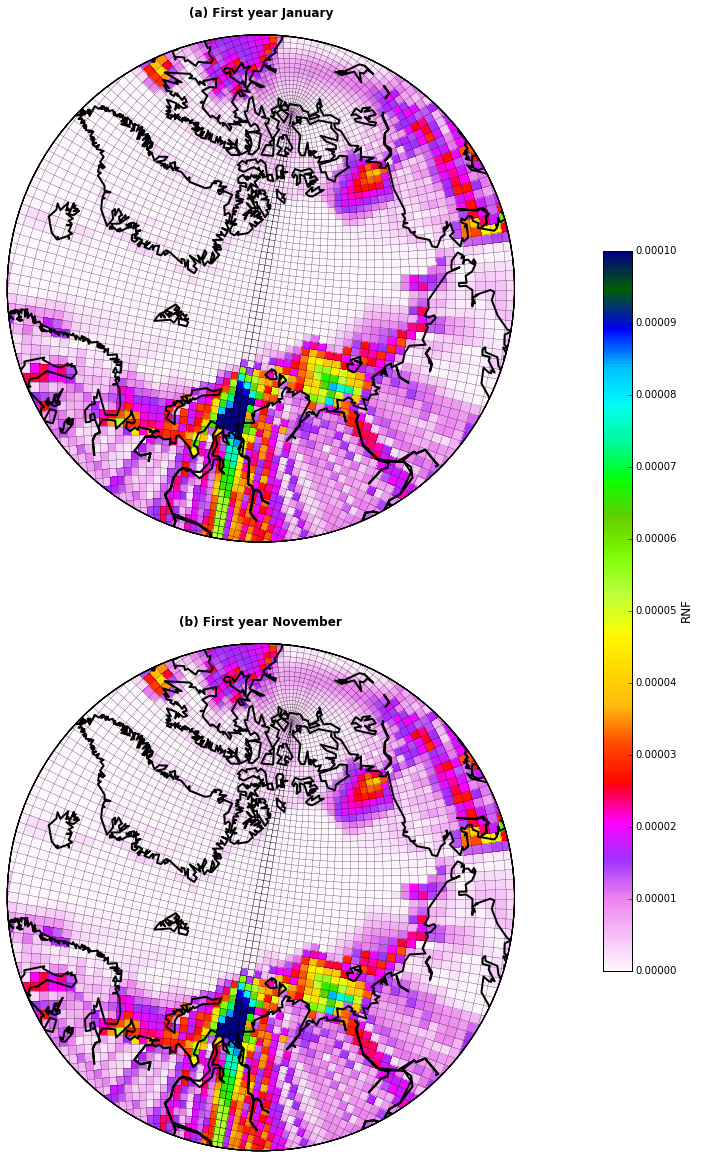

In [9]:
draw_rnf(rnf, longitude, latitude)

# MY_TRC EXP03

```frotran
trn(:, :, 1, jpmyt1) = Ba(:, :)/gdept(1, :, :)
```
`Ba(:, :)` is the same point source as EXP01   

In [10]:
ptrc_filename=glob.glob('_data/EXP03*.nc')
ptrc_obj = nc.Dataset(ptrc_filename[0])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

In [11]:
Ba.max()

0.00010707708

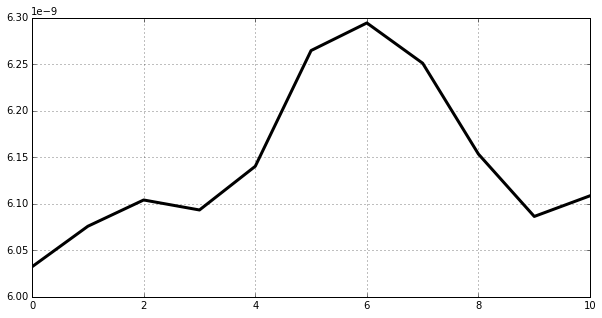

In [12]:
draw_temporal(Ba)

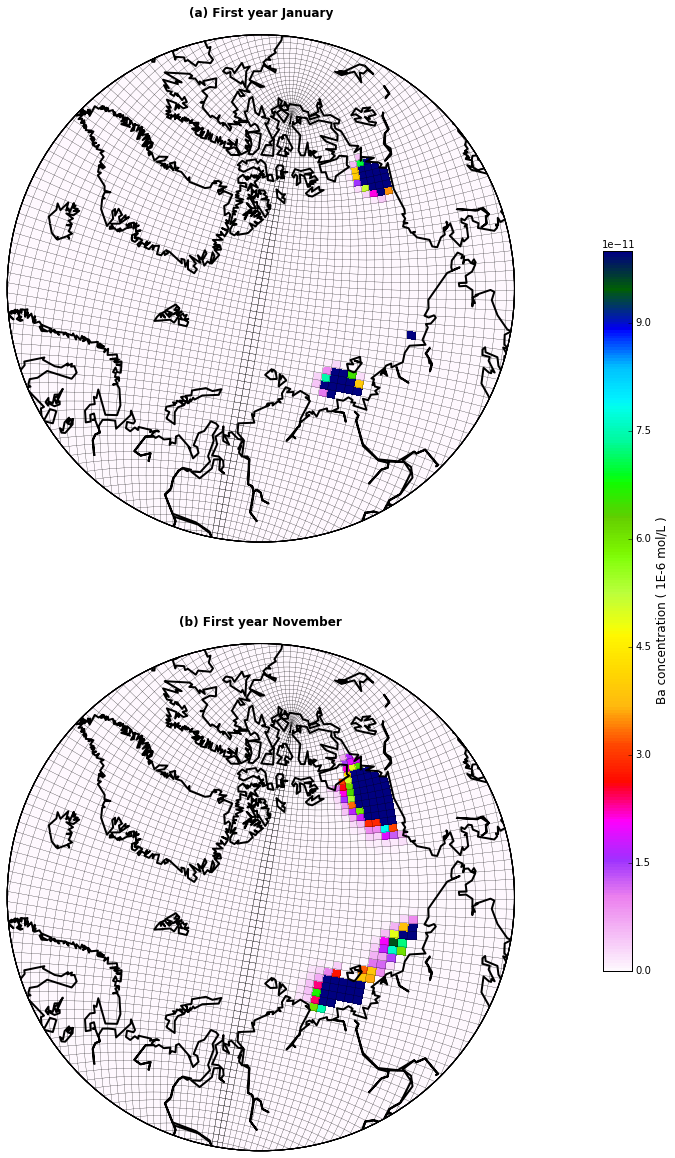

In [13]:
draw_Ba(Ba, longitude, latitude, vmax=1e-10)

# MY_TRC EXP04

Nearly the same as EXP02
```frotran
trn(:, :, 1, jpmyt1) = Ba(:,:)*rnf(:, :)/gdept(1, :, :)/1035
```
but do 

`Ba(:,:)*rnf(:, :)/1035`

before the run.

In [27]:
ptrc_filename=glob.glob('_data/EXP04*.nc')
ptrc_obj = nc.Dataset(ptrc_filename[0])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

In [28]:
Ba.max()

6.3368425

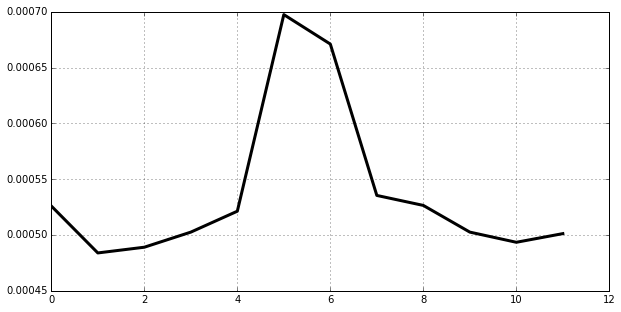

In [29]:
draw_temporal(Ba)

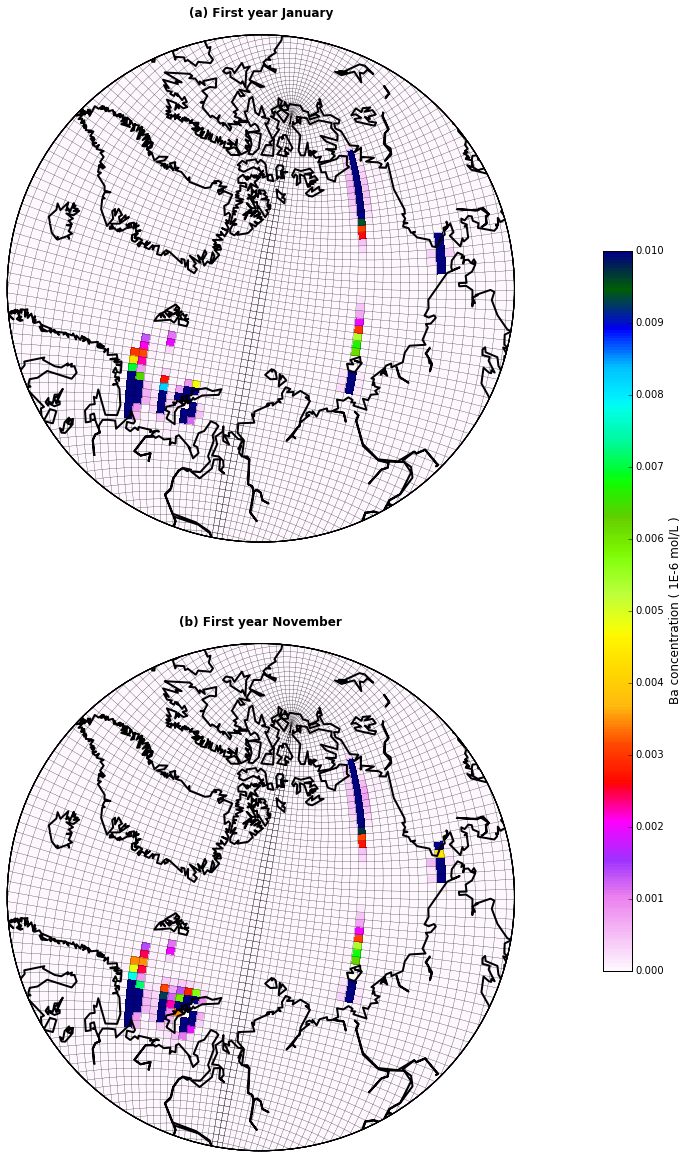

In [31]:
draw_Ba(Ba, longitude, latitude, vmax=0.01)

**Next step**
* Add an initial field for the run